In [2]:
import pandas as pd
import math

In [3]:

#f_str = input(  "Digite a equação dy/dx = f(x,y) (ex: 2*x*y ou math.exp(x) - y): ")

f_str_exemplo = str('2*x*y') # str() é redundante aqui, '2*x*y' já é string
x_exemplo = 1
y_exemplo = 2
h_exemplo = 0.1
interacoes_exemplo = 27

In [4]:

def resolver_edo_euler(f_str, x_inicial, y_inicial, h_passo, num_total_iteracoes):
    """
    Resolve uma EDO de primeira ordem dy/dx = f(x,y) usando o método de Euler.

    Args:
        f_str (str): A equação dy/dx = f(x,y) como string.
        x_inicial (float/int): Valor inicial de x (x0).
        y_inicial (float/int): Valor inicial de y (y0).
        h_passo (float/int): Tamanho do passo (h).
        num_total_iteracoes (int): Número de iterações a serem calculadas após o ponto inicial.

    Returns:
        tuple: Contendo:
            - df (pd.DataFrame): DataFrame com os resultados das iterações.
            - equacao_info (str): String descrevendo a equação fornecida.
            - condicoes_info (str): String descrevendo as condições iniciais.
            - passo_info (str): String descrevendo o passo h.
            - num_iteracoes_info (str): String descrevendo o número de iterações.
        Retorna (None, error_message, None, None, None) em caso de erro na conversão
        de input ou na interpretação da função.
    """

    try:
        x0 = float(x_inicial)
        y0 = float(y_inicial)
        h = float(h_passo)
        num_iteracoes = int(num_total_iteracoes)
    except ValueError:
        error_msg = "Erro: Entrada inválida. Certifique-se de que os valores numéricos (x_inicial, y_inicial, h_passo, num_total_iteracoes) estão corretos."
        return None, error_msg, None, None, None

    # Tenta criar a função a partir da string de entrada
    try:
        allowed_names = {"x": None, "y": None, "math": math}
        # Usamos f_str diretamente do parâmetro da função
        def func(x_eval, y_eval): return eval(f_str, {"__builtins__": {}}, {
            **allowed_names, "x": x_eval, "y": y_eval})
        # Teste inicial da função
        func(x0, y0)
    except Exception as e:
        error_msg = f"Erro ao interpretar a função f(x,y) ('{f_str}'): {e}\n" \
                    "Certifique-se de que a equação usa 'x' e 'y' como variáveis.\n" \
                    "Para funções matemáticas, use o prefixo 'math.', por exemplo, 'math.sin(x)'."
        return None, error_msg, None, None, None

    # Preparando as strings de informação para retorno
    equacao_info = f"Equação fornecida: dy/dx = {f_str}"
    condicoes_info = f"Condições iniciais: x0 = {x0}, y0 = {y0}"
    passo_info = f"Passo (h): {h}"
    num_iteracoes_info = f"Número de iterações: {num_iteracoes}"

    # Inicialização das listas para armazenar os dados
    resultados = []

    # Valores atuais
    x_k = x0
    y_k = y0
    y_anterior_para_erro = y0  # Usado para calcular |y_k - y_{k-1}|

    # Iteração 0 (ponto inicial)
    f_xy_k = func(x_k, y_k)
    erro_k = float('nan')
    resultados.append([0, x_k, y_k, f_xy_k, erro_k])

    # Loop para as iterações seguintes
    for i in range(1, num_iteracoes + 1):
        y_proximo = y_k + h * f_xy_k

        x_k = x0 + i * h
        y_k = y_proximo

        f_xy_k = func(x_k, y_k)
        erro_k = abs(y_k - y_anterior_para_erro)

        resultados.append([i, x_k, y_k, f_xy_k, erro_k])
        y_anterior_para_erro = y_k

    # Criação do DataFrame do Pandas
    colunas = ['Iter.', 'x_k', 'y_k', 'f(x_k,y_k)', '|y_k - y_{k-1}|']
    df = pd.DataFrame(resultados, columns=colunas)

    return df, equacao_info, condicoes_info, passo_info, num_iteracoes_info


In [5]:
dataframe, eq_info, ci_info, p_info, ni_info = resolver_edo_euler(
        f_str_exemplo,
        x_exemplo,
        y_exemplo,
        h_exemplo,
        interacoes_exemplo
    )

In [6]:

# Verificando se a função retornou com sucesso
if dataframe is not None:
    print("Solução de EDO pelo Método de Euler")
    print("------------------------------------")
    print(eq_info)
    print(ci_info)
    print(p_info)
    print(ni_info)
    print("------------------------------------\n")
    print("Resultados das Iterações:")
    # Configura o Pandas para exibir floats com um número específico de casas decimais, se desejado
    # pd.options.display.float_format = '{:.5f}'.format # Exemplo para 5 casas decimais
    print(dataframe.to_string(index=False, na_rep='NaN'))
else:
    # 'eq_info' conteria a mensagem de erro neste caso
    print(f"Não foi possível calcular a solução: {eq_info}")

print("\n--- Exemplo com erro na equação ---")
dataframe_erro, msg_erro, _, _, _ = resolver_edo_euler(
    "2*x*z", # Equação com variável 'z' não definida
    1, 2, 0.1, 5
)
if dataframe_erro is None:
    print(msg_erro)

Solução de EDO pelo Método de Euler
------------------------------------
Equação fornecida: dy/dx = 2*x*y
Condições iniciais: x0 = 1.0, y0 = 2.0
Passo (h): 0.1
Número de iterações: 27
------------------------------------

Resultados das Iterações:
 Iter.  x_k          y_k    f(x_k,y_k)  |y_k - y_{k-1}|
     0  1.0     2.000000      4.000000              NaN
     1  1.1     2.400000      5.280000         0.400000
     2  1.2     2.928000      7.027200         0.528000
     3  1.3     3.630720      9.439872         0.702720
     4  1.4     4.574707     12.809180         0.943987
     5  1.5     5.855625     17.566876         1.280918
     6  1.6     7.612313     24.359401         1.756688
     7  1.7    10.048253     34.164060         2.435940
     8  1.8    13.464659     48.472772         3.416406
     9  1.9    18.311936     69.585357         4.847277
    10  2.0    25.270472    101.081887         6.958536
    11  2.1    35.378660    148.590374        10.108189
    12  2.2    50.237698

In [7]:
dataframe

,Iter.,x_k,y_k,"f(x_k,y_k)",|y_k - y_{k-1}|
0,0,1.0,2.000000,4.000000,NaN
1,1,1.1,2.400000,5.280000,0.400000
2,2,1.2,2.928000,7.027200,0.528000
3,3,1.3,3.630720,9.439872,0.702720
4,4,1.4,4.574707,12.809180,0.943987
5,5,1.5,5.855625,17.566876,1.280918
6,6,1.6,7.612313,24.359401,1.756688
7,7,1.7,10.048253,34.164060,2.435940
8,8,1.8,13.464659,48.472772,3.416406
9,9,1.9,18.311936,69.585357,4.847277


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Para formatação dos eixos, se necessário


In [13]:
def gerar_grafico_edo(df_resultados, titulo_grafico="Solução da EDO pelo Método de Euler"):
    """
    Gera e exibe um gráfico da solução da EDO (y_k vs x_k) e do erro
    (|y_k - y_{k-1}| vs x_k) a partir de um DataFrame.

    Args:
        df_resultados (pd.DataFrame): DataFrame com os resultados das iterações.
                                      Deve conter as colunas 'x_k', 'y_k', e '|y_k - y_{k-1}|'.
        titulo_grafico (str, optional): Título do gráfico.
                                         Default é "Solução da EDO pelo Método de Euler".
    """
    if not isinstance(df_resultados, pd.DataFrame):
        print("Erro: A entrada deve ser um DataFrame do Pandas.")
        return
    if not {'x_k', 'y_k', '|y_k - y_{k-1}|'}.issubset(df_resultados.columns):
        print("Erro: O DataFrame deve conter as colunas 'x_k', 'y_k' e '|y_k - y_{k-1}|'.")
        return
    if df_resultados.empty:
        print("Erro: O DataFrame está vazio, nada para plotar.")
        return

    plt.figure(figsize=(12, 7))

    # 1. Plota y_k versus x_k (a solução principal)
    plt.plot(df_resultados['x_k'], df_resultados['y_k'], marker='o', linestyle='-', color='blue', label='$y_k$ (Solução de Euler)')

    # 2. Plota |y_k - y_{k-1}| versus x_k
    # A primeira entrada de erro é NaN, o matplotlib geralmente lida com isso
    # não plotando o ponto ou criando uma quebra na linha.
    plt.plot(df_resultados['x_k'], df_resultados['|y_k - y_{k-1}|'], marker='s', linestyle='--', color='red', label='$|y_k - y_{k-1}|$ (Erro)')

    # Adiciona títulos e legendas
    plt.title(titulo_grafico, fontsize=16)
    plt.xlabel("$x_k$", fontsize=14)
    plt.ylabel("Valores", fontsize=14) # Rótulo genérico para o eixo y, já que plota y_k e o erro
    plt.legend(fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)

    # Ajusta o layout para evitar que os rótulos se sobreponham
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()

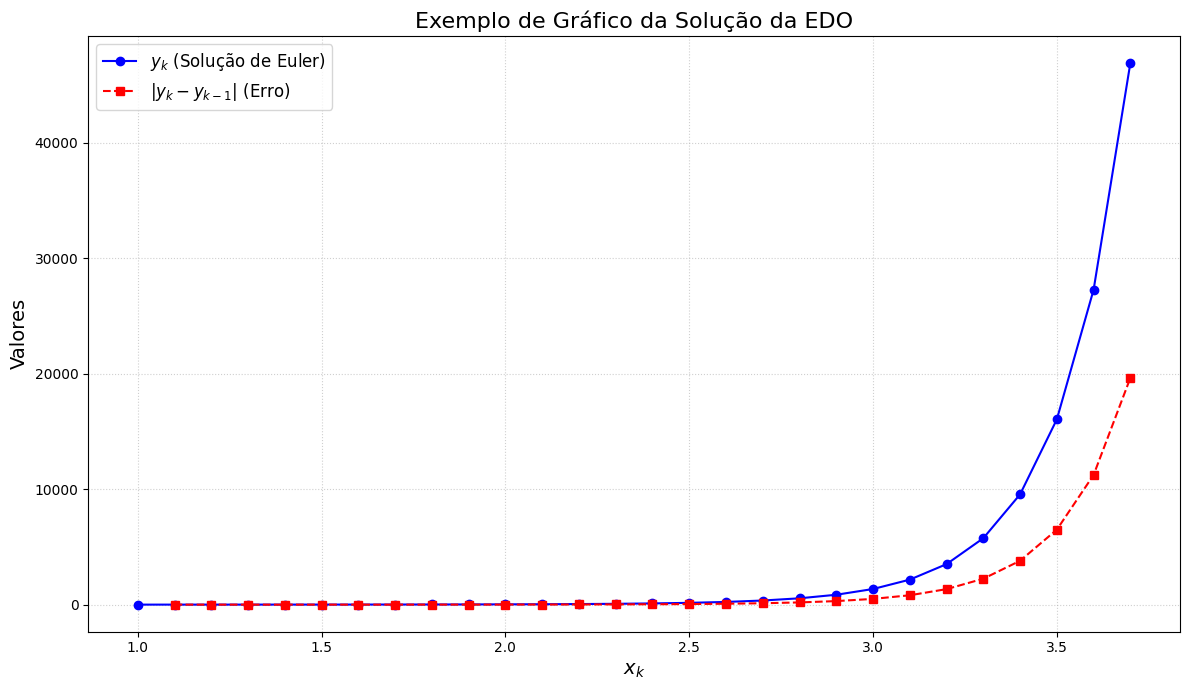

In [14]:
gerar_grafico_edo(dataframe, titulo_grafico="Exemplo de Gráfico da Solução da EDO")
